### Convolution & pooling

In [139]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

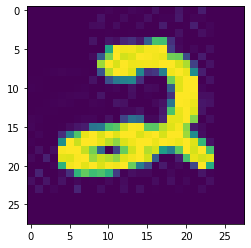

In [140]:
img = Image.open('Images/img_1.jpg')
_ = plt.imshow(img)

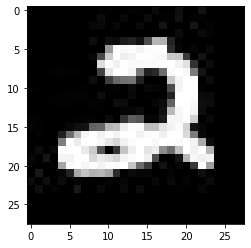

In [141]:
img_gray = img.convert('LA')
_ = plt.imshow(img_gray)

In [142]:
img_mat = np.array(list(img_gray.getdata(band=0)), np.uint8)
img_mat.shape
img_mat.shape = (img_gray.size[1], img_gray.size[0])
img_mat.shape

(28, 28)

In [191]:
class convolution:

    def __init__(self, kernel: tuple, depth: int, padding: int, stride: int) -> None:
        # Getting input
        self.kernel = kernel
        self.depth = depth
        self.padding = padding
        self.stride = stride
        self.ker_row = kernel[0]
        self.ker_col = kernel[1]

    # Convolution Layer
    def conv(self,input_data):
        # Kernel elements
        k_mat = [0,1,-1]
        # Randomly generated kernel
        kernel = np.random.choice(k_mat,(self.ker_row,self.ker_col))
        # Dimention of Output feature map
        output_feature_map_row = int(np.floor((len(input_data) - len(kernel) + 2*self.padding) / self.stride + 1))
        output_feature_map_col = int(np.floor((len(input_data[0]) - len(kernel[0]) + 2*self.padding) / self.stride + 1))
        # Output dimention without stride
        out_row = len(input_data) - len(kernel) + 2*self.padding + 1
        out_col = len(input_data[0]) - len(kernel[0]) + 2*self.padding + 1
        input_data = np.pad(input_data,(self.padding,self.padding),'constant', constant_values=(0))
        conv_layer = []
        # Multiplication of kernel and input image
        for i  in range(0,out_row,self.stride):
            for j in range(0,out_col,self.stride):
                val = np.sum(np.dot(input_data[i:i+len(kernel),j:j+len(kernel[0])],kernel))
                conv_layer.append(val)
        conv_layer = np.array(conv_layer).reshape(output_feature_map_row,output_feature_map_col)
        return conv_layer
    
    # Pooling Layers
    def max_pool(self,input_data,kernel: tuple):
        pooling_layer = []
        for i in range(len(input_data) - kernel[0] + 1):
            for j in range(len(input_data[0]) - kernel[1] + 1):
                # Getting the elements from matrix of the kernel size and max among them
                pool_var = np.max(input_data[i:i+kernel[0],j:j+kernel[1]].flatten())
                pooling_layer.append(pool_var)
        pooling_layer = np.array(pooling_layer).reshape(len(input_data) - kernel[0] + 1,len(input_data[0]) - kernel[1] + 1)
        return pooling_layer                
    
    def min_pool(self,input_data,kernel: tuple):
        pooling_layer = []
        for i in range(len(input_data) - kernel[0] + 1):
            for j in range(len(input_data[0]) - kernel[1] + 1):
                # Getting the elements from matrix of the kernel size and min among them
                pool_var = np.min(input_data[i:i+kernel[0],j:j+kernel[1]].flatten())
                pooling_layer.append(pool_var)
        pooling_layer = np.array(pooling_layer).reshape(len(input_data) - kernel[0] + 1,len(input_data[0]) - kernel[1] + 1)
        return pooling_layer   

    def avg_pool(self,input_data,kernel: tuple):
        pooling_layer = []
        for i in range(len(input_data) - kernel[0] + 1):
            for j in range(len(input_data[0]) - kernel[1] + 1):
                # Getting the elements from matrix of the kernel size and avg them
                pool_var = np.mean(input_data[i:i+kernel[0],j:j+kernel[1]].flatten())
                pooling_layer.append(pool_var)
        pooling_layer = np.array(pooling_layer).reshape(len(input_data) - kernel[0] + 1,len(input_data[0]) - kernel[1] + 1)
        return pooling_layer   


In [192]:
con = convolution((3,3),1,3,2)
conv1 = con.conv(img_mat)
pool_img = con.max_pool(conv1,(3,3))

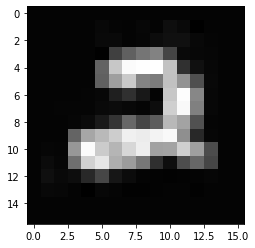

In [193]:
plt.imshow(conv1,cmap='gray')

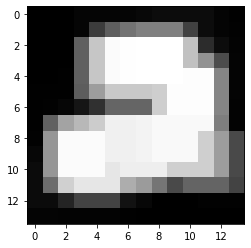

In [194]:
plt.imshow(pool_img,cmap='gray')

### Edge Detectation

In [154]:
dog2 = Image.open('Images/dog 2.jpg')
dog2_gray = dog2.convert('LA')
dog2_mat = np.array(list(dog2_gray.getdata(band=0)),np.uint8).reshape(dog2_gray.size[1],dog2_gray.size[0])
dog2_mat.shape

(540, 959)

In [155]:
dog2_mat

array([[68, 68, 68, ..., 93, 93, 93],
       [68, 68, 69, ..., 93, 93, 93],
       [68, 69, 69, ..., 93, 93, 93],
       ...,
       [46, 46, 46, ..., 89, 88, 87],
       [46, 46, 46, ..., 89, 88, 87],
       [46, 46, 46, ..., 89, 88, 87]], dtype=uint8)

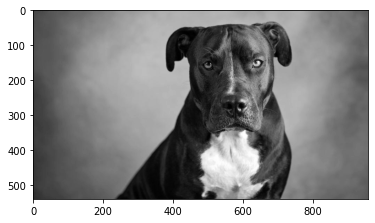

In [156]:
plt.imshow(dog2_mat,cmap='gray')

In [200]:
from copy import deepcopy

class EdgeDetection:

    # Getting the input matrix
    def __init__(self,inp_mat) -> None:
        self.inp_mat = inp_mat


    def edge_detection_by_row(self):
        copy_mat = deepcopy(self.inp_mat)
        # Subtraction of each row from previous row excerpt first row
        for i in range(1,len(self.inp_mat)):
            copy_mat[i,:] = copy_mat[i,:] - self.inp_mat[i-1,:]
        # Output of matrix without first row
        return copy_mat[1:,:]

    def edge_detection_by_col(self):
        copy_mat = deepcopy(self.inp_mat)
        # Subtraction of each column from previous column excerpt first column
        for i in range(1,len(self.inp_mat[0])):
            copy_mat[:,i] = copy_mat[:,i] - self.inp_mat[:,i-1]
        # Output of the matrix without first column
        return copy_mat[:,1:]
    
    def edge_detection(self):
        copy_mat = deepcopy(self.inp_mat)
        # Subtraction of each row and column from previous ones excerpt first
        for i in range(1,len(self.inp_mat[0])):
            copy_mat[:,i] = copy_mat[:,i] - self.inp_mat[:,i-1]
        for j in range(1,len(self.inp_mat)):
            copy_mat[j,:] = copy_mat[j,:] - self.inp_mat[j-1,:]
        # Output of the matrix without first row and column
        return copy_mat[1:,1:]

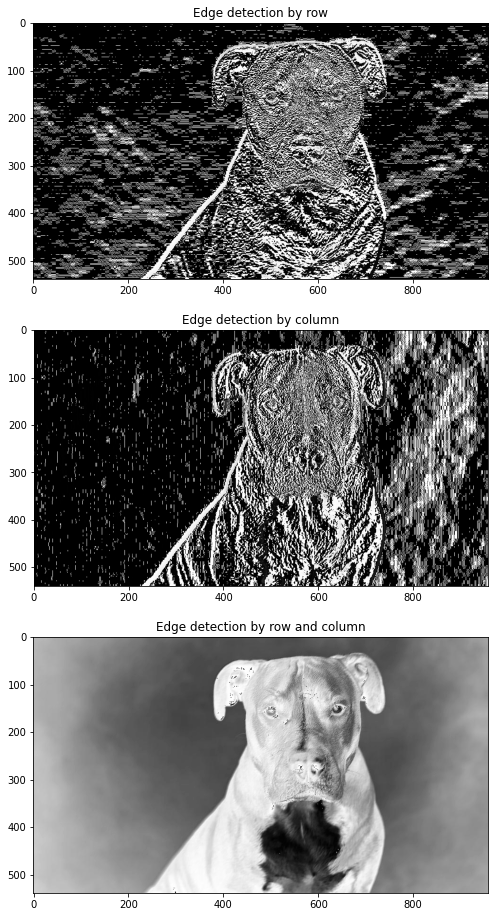

In [199]:
dog_img = EdgeDetection(dog2_mat)
dog_edge = dog_img.edge_detection()
dog_edge_by_row = dog_img.edge_detection_by_row()
dog_edge_by_col = dog_img.edge_detection_by_col()
plt.figure(figsize=(10, 16))
plt.subplot(3,1,3)
plt.imshow(dog_edge,cmap='gray')
plt.title('Edge detection by row and column')
plt.subplot(3,1,1)
plt.imshow(dog_edge_by_row,cmap='gray')
plt.title('Edge detection by row')
plt.subplot(3,1,2)
plt.imshow(dog_edge_by_col,cmap='gray')
plt.title('Edge detection by column')
plt.show()